In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

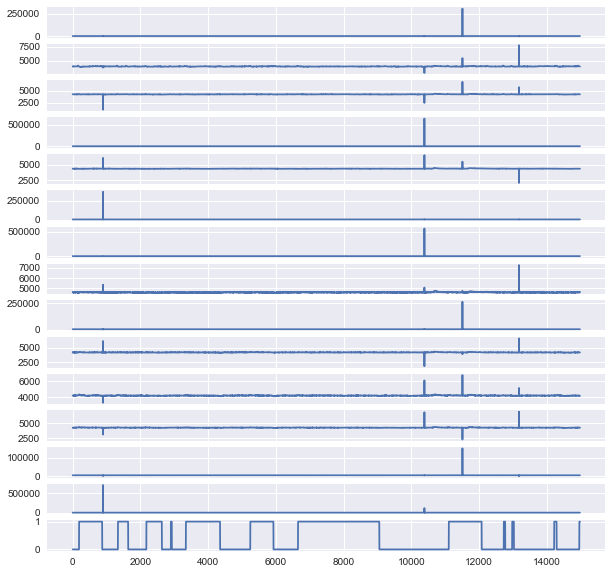

In [13]:
data = pd.read_csv('EEG Eye State.csv')
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
plt.figure(figsize=(10, 10))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])

In [14]:
# remove outliers from the EEG data
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
# load the dataset.
data = read_csv('EEG Eye State.csv', header=None)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculate column mean and standard deviation
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	# define outlier bounds
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	# remove too small
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	# remove too large
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')

>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


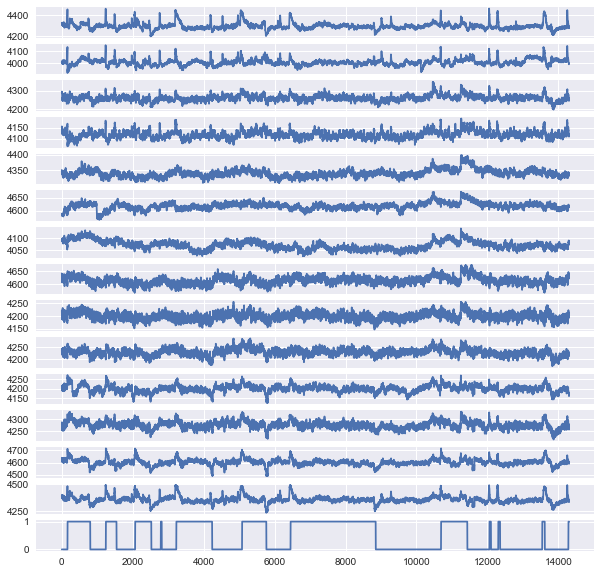

In [17]:
# visualize dataset without outliers
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
plt.figure(figsize=(10, 10))
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [67]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
# load the dataset
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)
values = data.values
# evaluate knn using 10-fold cross-validation
scores = list()
kfold = KFold(10, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(values):
    # define train/test X/y
    trainX, trainy = values[train_ix, :-1], values[train_ix, -1]
    testX, testy = values[test_ix, :-1], values[test_ix, -1]
    # define model
    model = KNeighborsClassifier(n_neighbors=3)
    # fit model on train set
    model.fit(trainX, trainy)
    # forecast test set
    yhat = model.predict(testX)
    # evaluate predictions
    score = accuracy_score(testy, yhat)
    # store
    scores.append(score)
    print('>%.3f' % score)
# calculate mean score across each run
print('Final Score: %.3f' % (mean(scores)))

>0.970
>0.975
>0.978
>0.977
>0.973
>0.979
>0.978
>0.976
>0.974
>0.969
Final Score: 0.975


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
count,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000
mean,4298.144530,4007.199968,4261.656384,4120.176654,4339.673482,4618.165981,4070.977384,4614.060973,4199.641958,4229.291521,4199.729761,4276.866449,4603.123432,4358.072562,0.450853
std,32.384305,27.223294,16.219864,16.905374,11.994652,12.923984,17.708529,14.398764,13.808226,15.006151,18.338833,15.089675,25.536618,31.877692,0.497596
min,4198.970000,3913.330000,4197.440000,4067.180000,4308.720000,4566.150000,4026.150000,4567.180000,4147.690000,4170.260000,4125.130000,4216.410000,4490.770000,4236.410000,0.000000
25%,4280.510000,3990.260000,4250.260000,4107.690000,4331.790000,4611.790000,4057.440000,4604.620000,4190.770000,4220.000000,4189.740000,4267.180000,4590.260000,4341.540000,0.000000
50%,4293.330000,4004.620000,4262.050000,4120.000000,4338.460000,4617.440000,4069.740000,4613.330000,4199.490000,4228.720000,4199.490000,4275.900000,4602.560000,4354.360000,0.000000
75%,4308.720000,4020.510000,4268.720000,4128.720000,4346.150000,4625.640000,4082.560000,4623.080000,4208.210000,4238.460000,4210.260000,4286.150000,4615.380000,4370.260000,1.000000
max,4466.150000,4154.360000,4349.230000,4191.790000,4397.950000,4672.310000,4138.970000,4672.820000,4255.900000,4288.210000,4271.280000,4332.310000,4716.410000,4491.280000,1.000000


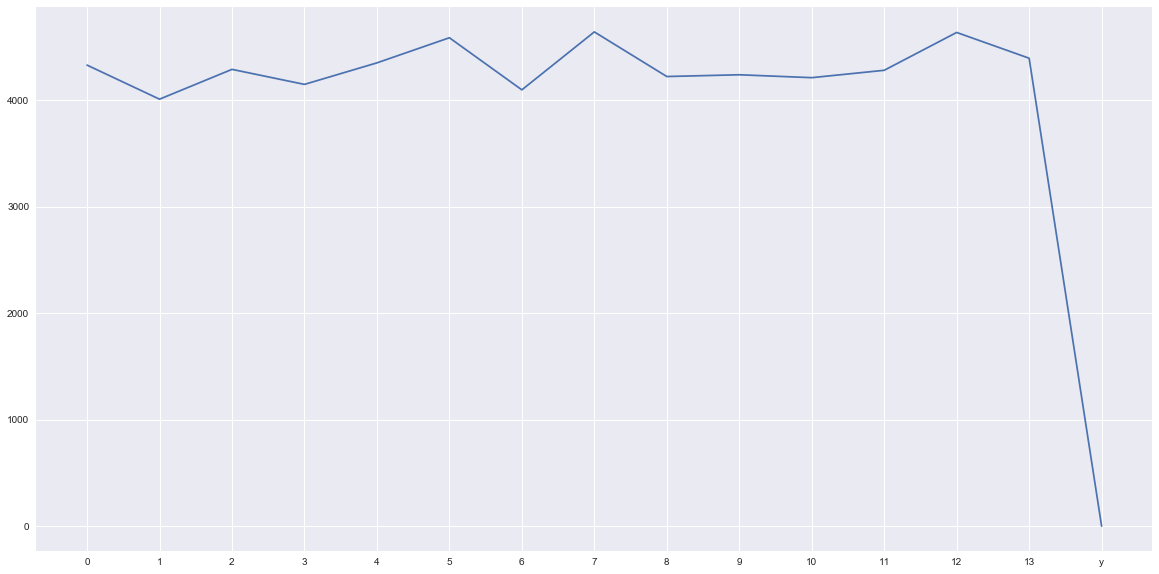

In [72]:
data = read_csv('EEG_Eye_State_no_outliers.csv', header=None)

plt.figure(figsize=(20, 10))
data.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 'y']

plt.plot(data.iloc[0])
data.describe()